In [1]:
# Import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].unique()

array([0, 1])

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df['Amount'].var()

62560.06904632383

In [10]:
df['Amount'].mean()

88.34961925093133

In [11]:
correlation = df.corr()

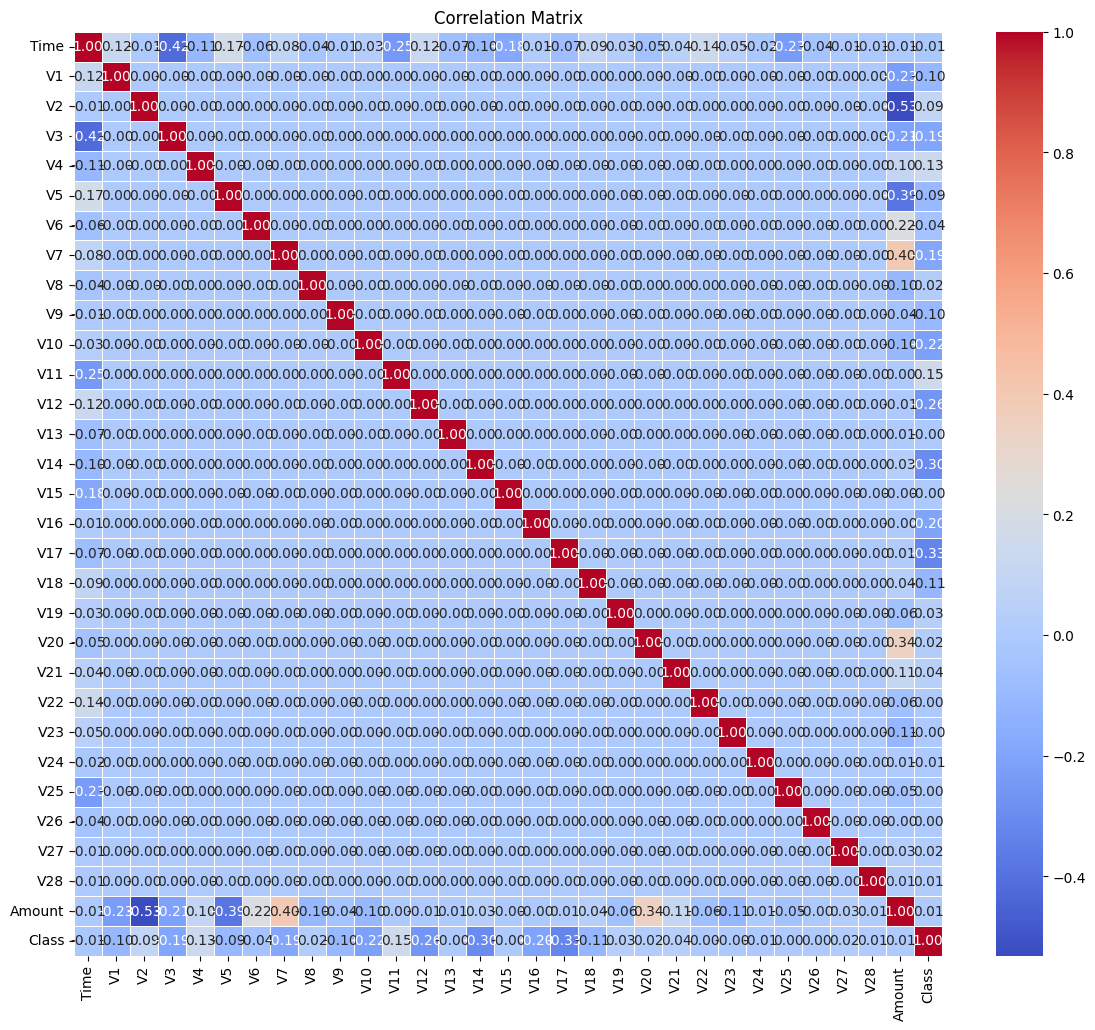

In [12]:
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.shape

(284807, 31)

In [14]:
# Standardising the amount column
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [15]:
x = df.drop(['Class'],axis = 1)
y = df['Class']

In [16]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = 0)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


# Applying Classification Algorithms

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9990
Model Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       0.76      0.70      0.73       110

    accuracy                           1.00     56962
   macro avg       0.88      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962

LogisticRegression's bias is  0.9989817639184533
LogisticRegression's variance is  0.9989993328885924


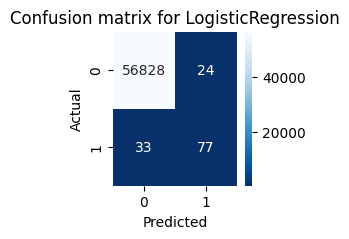

Model: DecisionTreeClassifier
Accuracy: 0.9992
Model Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.79      0.78      0.79       102

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

DecisionTreeClassifier's bias is  1.0
DecisionTreeClassifier's variance is  0.9992451107756047


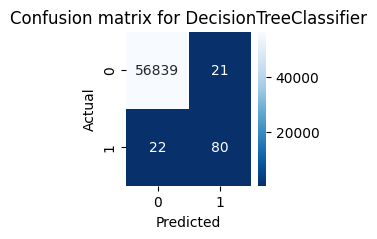

Model: RandomForestClassifier
Accuracy: 0.9995
Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56876
           1       0.79      0.93      0.86        86

    accuracy                           1.00     56962
   macro avg       0.90      0.96      0.93     56962
weighted avg       1.00      1.00      1.00     56962

RandomForestClassifier's bias is  1.0
RandomForestClassifier's variance is  0.9995259997893332


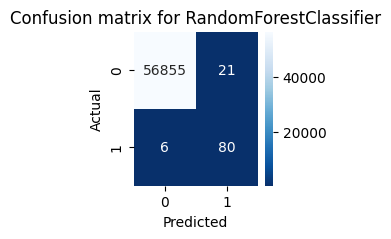

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: SVC
Accuracy: 0.9982
Model Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.00      0.00      0.00         0

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

SVC's bias is  0.9982839210867037
SVC's variance is  0.9982268881008391


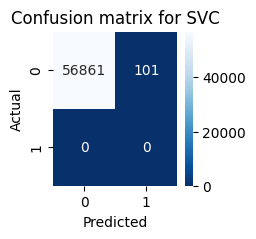

Model: KNeighborsClassifier
Accuracy: 0.9984
Model Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56953
           1       0.09      1.00      0.16         9

    accuracy                           1.00     56962
   macro avg       0.54      1.00      0.58     56962
weighted avg       1.00      1.00      1.00     56962

KNeighborsClassifier's bias is  0.9985823695933639
KNeighborsClassifier's variance is  0.9983848881710614


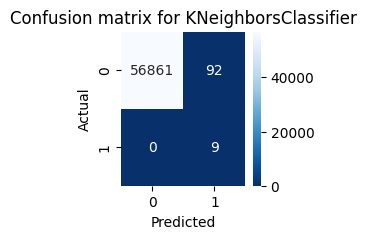

Model: GaussianNB
Accuracy: 0.9929
Model Parameters: {'priors': None, 'var_smoothing': 1e-09}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     56534
           1       0.61      0.14      0.23       428

    accuracy                           0.99     56962
   macro avg       0.80      0.57      0.62     56962
weighted avg       0.99      0.99      0.99     56962

GaussianNB's bias is  0.9929601264017205
GaussianNB's variance is  0.9928899968399986


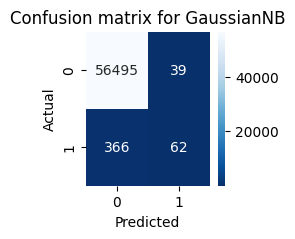

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: MLPClassifier
Accuracy: 0.9982
Model Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.00      0.00      0.00         0

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

MLPClassifier's bias is  0.9982926989839583
MLPClassifier's variance is  0.9982268881008391


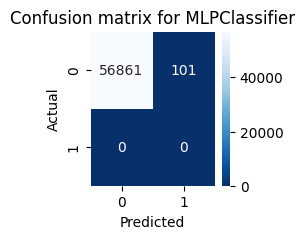

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: VotingClassifier
Accuracy: 0.9992
Model Parameters: {'estimators': [('logreg', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier()), ('svm', SVC()), ('knn', KNeighborsClassifier()), ('nb', GaussianNB()), ('mlp', MLPClassifier())], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'hard', 'weights': None, 'logreg': LogisticRegression(), 'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'svm': SVC(), 'knn': KNeighborsClassifier(), 'nb': GaussianNB(), 'mlp': MLPClassifier(), 'logreg__C': 1.0, 'logreg__class_weight': None, 'logreg__dual': False, 'logreg__fit_intercept': True, 'logreg__intercept_scaling': 1, 'logreg__l1_ratio': None, 'logreg__max_iter': 100, 'logreg__multi_class': 'auto', 'logreg__n_jobs': None, 'logreg__penalty': 'l2', 'logreg__random_state': None, 'logreg__solver': 'lbfgs', 'logreg__tol': 0.0001, 'logreg__verbose': 0, 'logreg__warm_start': False, 'dt__ccp_alpha': 0.0, 'dt__class_weight': None, 

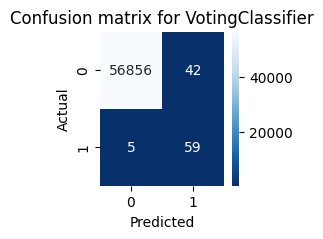

In [21]:
# Initialize classifiers
logreg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()
mlp_classifier = MLPClassifier()

# Create an ensemble of classifiers
ensemble_classifier = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('svm', svm_classifier),
    ('knn', knn_classifier),
    ('nb', nb_classifier),
    ('mlp', mlp_classifier)
], voting='hard')

# Train and evaluate each classifier
classifiers = [logreg, dt_classifier, rf_classifier, svm_classifier, knn_classifier, nb_classifier, mlp_classifier, ensemble_classifier]
rank_table = []
for clf in classifiers:
  # Fit the classifier on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    predictions = clf.predict(x_test)

    # Evaluate the model
    clf_ac = accuracy_score(predictions,y_test)
    clf_cm = confusion_matrix(predictions,y_test)
    clf_cr = classification_report(predictions,y_test)

    # Get model-specific information
    model_name = type(clf).__name__
    model_parameters = clf.get_params()

    # Print information
    print(f"Model: {model_name}")
    print(f"Accuracy: {clf_ac:.4f}")
    print(f"Model Parameters: {model_parameters}")
    print("Classification Report:\n", clf_cr)
    print(f"{model_name}'s bias is " ,clf.score(x_train,y_train))
    print(f"{model_name}'s variance is " ,clf.score(x_test,y_test))

    # Plotting the Confusion Matrix
    plt.figure(figsize=(2,2))
    sns.heatmap(clf_cm, annot=True, fmt='d', cmap='Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix for {model_name}')
    plt.show()

    rank_table.append([model_name,clf_ac*100,clf.score(x_train,y_train)*100,clf.score(x_test,y_test)*100])

In [36]:
rank_table = pd.DataFrame(rank_table,columns = ['Algorithms','Accuracy','Bias','Variance'])
rank_table

,Algorithms,Accuracy,Bias,Variance
0,LogisticRegression,0.998999,99.898176,99.899933
1,DecisionTreeClassifier,0.999245,100.000000,99.924511
2,RandomForestClassifier,0.999526,100.000000,99.952600
3,SVC,0.998227,99.828392,99.822689
4,KNeighborsClassifier,0.998385,99.858237,99.838489
5,GaussianNB,0.992890,99.296013,99.289000
6,MLPClassifier,0.998227,99.829270,99.822689
7,VotingClassifier,0.999175,99.937238,99.917489
